# Linear model of anxiety on the student mental


## Introduction
The main objetive of this notebook it is to create a linear model capable of predict if a given student have panic attack.


Lesson 5 - Student 190011611

Github: ciro-c

## Importing packages

In [3]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
np.set_printoptions(linewidth=140)
torch.set_printoptions(linewidth=140, sci_mode=False, edgeitems=7)
pd.set_option('display.width', 140)

## Getting dataset and pre processing

The dataset we are going to use to train our model is [Student Mental health](https://www.kaggle.com/datasets/shariful07/student-mental-health/data)

In [4]:
df = pd.read_csv("/kaggle/input/student-mental-health/Student Mental health.csv")
df.head(5)

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


The column timestamp it means nothing to our goal. So we are going to exclude it.

In [5]:
df.drop('Timestamp', axis=1, inplace=True)
df.head(5)

,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


Now lets change the columns names to be more easy to manipulate


In [6]:
new_columns = ['Gender','Age','Major','Year','CGPA','Marriage','Depression','Anxiety','Panic','Treatment']
df.columns = new_columns
df.head(5)

,Gender,Age,Major,Year,CGPA,Marriage,Depression,Anxiety,Panic,Treatment
0,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


Now lets change Major and Year lines to upper case

In [7]:
df['Year'] = df['Year'].str.upper()
df['Major'] = df['Major'].str.upper()

In [8]:
df['Major'].unique()

array(['ENGINEERING', 'ISLAMIC EDUCATION', 'BIT', 'LAWS', 'MATHEMATHICS', 'PENDIDIKAN ISLAM', 'BCS', 'HUMAN RESOURCES', 'IRKHS',
       'PSYCHOLOGY', 'KENMS', 'ACCOUNTING ', 'ENM', 'MARINE SCIENCE', 'KOE', 'BANKING STUDIES', 'BUSINESS ADMINISTRATION', 'LAW', 'KIRKHS',
       'USULUDDIN ', 'TAASL', 'ENGINE', 'ALA', 'BIOMEDICAL SCIENCE', 'BENL', 'IT', 'CTS', 'ENGIN', 'ECONS', 'MHSC', 'MALCOM', 'KOP',
       'HUMAN SCIENCES ', 'BIOTECHNOLOGY', 'COMMUNICATION ', 'DIPLOMA NURSING', 'PENDIDIKAN ISLAM ', 'RADIOGRAPHY', 'FIQH FATWA ',
       'DIPLOMA TESL', 'FIQH', 'NURSING '], dtype=object)

In [9]:
df['Year'].unique()

array(['YEAR 1', 'YEAR 2', 'YEAR 3', 'YEAR 4'], dtype=object)

In [10]:
df['CGPA'].unique()

array(['3.00 - 3.49', '3.50 - 4.00', '3.50 - 4.00 ', '2.50 - 2.99', '2.00 - 2.49', '0 - 1.99'], dtype=object)

Checking for dupplicates and treating null or missing values 

In [11]:
df.duplicated().sum()

0

In [12]:
# Missing values
df.isna().sum()

Gender        0
Age           1
Major         0
Year          0
CGPA          0
Marriage      0
Depression    0
Anxiety       0
Panic         0
Treatment     0
dtype: int64

In [13]:
#Dropping missing values
df.dropna(inplace=True)
df.isna().sum()

Gender        0
Age           0
Major         0
Year          0
CGPA          0
Marriage      0
Depression    0
Anxiety       0
Panic         0
Treatment     0
dtype: int64

In [14]:
#Current number of lines 
df.shape[0]

100

Changging all binaries columns to ones and zeros

In [15]:
df['Marriage'] = df['Marriage'].map({'Yes': 1, 'No': 0})
df['Depression'] = df['Depression'].map({'Yes': 1, 'No': 0})
df['Anxiety'] = df['Anxiety'].map({'Yes': 1, 'No': 0})
df['Panic'] = df['Panic'].map({'Yes': 1, 'No': 0})
df['Treatment'] = df['Treatment'].map({'Yes': 1, 'No': 0})
df['Gender'] = df['Gender'].map({'Female': 1, 'Male': 0})
df['CGPA'] = df['CGPA'].map({'3.00 - 3.49':4, '3.50 - 4.00':5, '3.50 - 4.00 ':5, '2.50 - 2.99':3, '2.00 - 2.49': 1, '0 - 1.99': 0})

## Data analisys

Text(0, 0.5, 'Frequency')

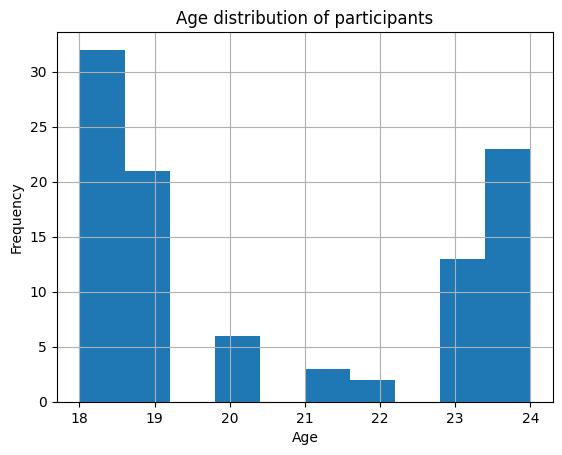

In [16]:
df['Age'].hist()
plt.title('Age distribution of participants')
plt.xlabel('Age')
plt.ylabel('Frequency')

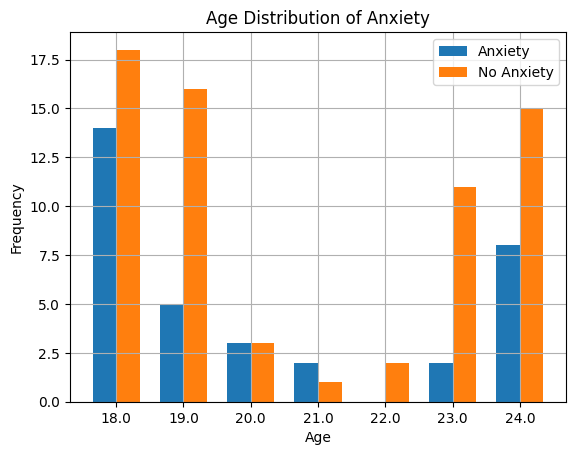

In [38]:
df_anxiety = df[df['Anxiety'] == 1]
df_no_anxiety = df[df['Anxiety'] == 0]
# Count the ages
anxiety_counts = df_anxiety['Age'].value_counts().sort_index()
no_anxiety_counts = df_no_anxiety['Age'].value_counts().sort_index()

# Ensure that the counts for each age group are the same
ages = anxiety_counts.index.union(no_anxiety_counts.index)
anxiety_counts = anxiety_counts.reindex(ages, fill_value=0)
no_anxiety_counts = no_anxiety_counts.reindex(ages, fill_value=0)

# Create the distribution graph
width = 0.35
x = np.arange(len(ages))

plt.bar(x - width/2, anxiety_counts, width, label='Anxiety')
plt.bar(x + width/2, no_anxiety_counts, width, label='No Anxiety')

plt.xticks(x, ages)
plt.title('Age Distribution of Anxiety')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

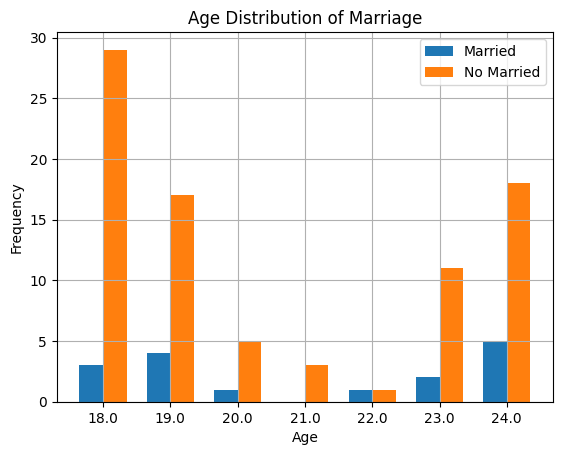

In [17]:
df_married = df[df['Marriage'] == 1]
df_no_married = df[df['Marriage'] == 0]
# Count the ages
married_counts = df_married['Age'].value_counts().sort_index()
no_married_counts = df_no_married['Age'].value_counts().sort_index()

# Ensure that the counts for each age group are the same
ages = married_counts.index.union(no_married_counts.index)
married_counts = married_counts.reindex(ages, fill_value=0)
no_married_counts = no_married_counts.reindex(ages, fill_value=0)

# Create the distribution graph
width = 0.35
x = np.arange(len(ages))

plt.bar(x - width/2, married_counts, width, label='Married')
plt.bar(x + width/2, no_married_counts, width, label='No Married')

plt.xticks(x, ages)
plt.title('Age Distribution of Marriage')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

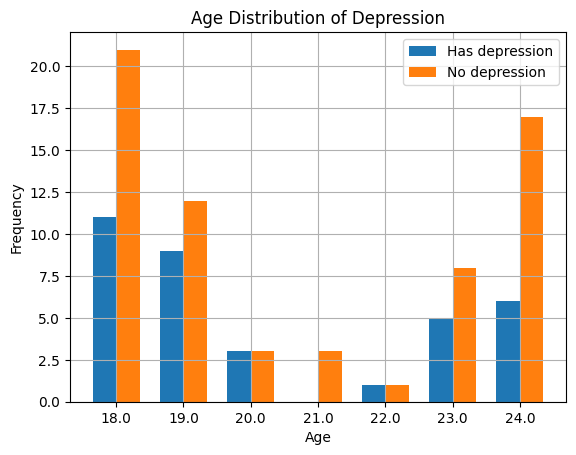

In [18]:
df_depressed = df[df['Depression'] == 1]
df_no_depressed = df[df['Depression'] == 0]
# Count the ages
depressed_counts = df_depressed['Age'].value_counts().sort_index()
no_depressed_counts = df_no_depressed['Age'].value_counts().sort_index()

# Ensure that the counts for each age group are the same
ages = depressed_counts.index.union(no_depressed_counts.index)
depressed_counts = depressed_counts.reindex(ages, fill_value=0)
no_depressed_counts = no_depressed_counts.reindex(ages, fill_value=0)

# Create the distribution graph
width = 0.35
x = np.arange(len(ages))

plt.bar(x - width/2, depressed_counts, width, label='Has depression')
plt.bar(x + width/2, no_depressed_counts, width, label='No depression')

plt.xticks(x, ages)
plt.title('Age Distribution of Depression')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

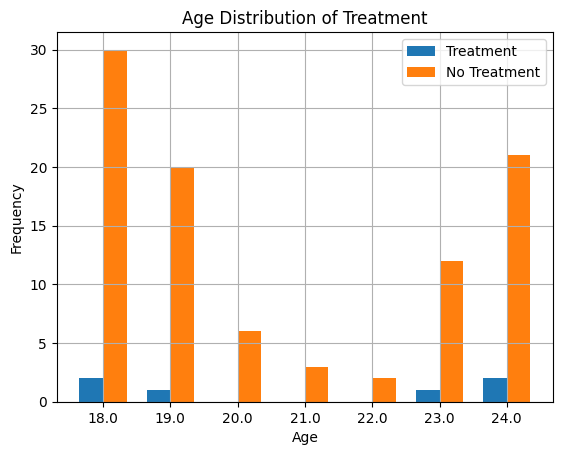

In [19]:
df_treatment = df[df['Treatment'] == 1]
df_no_treatment = df[df['Treatment'] == 0]
# Count the ages
treatment_counts = df_treatment['Age'].value_counts().sort_index()
no_treatment_counts = df_no_treatment['Age'].value_counts().sort_index()

# Ensure that the counts for each age group are the same
ages = treatment_counts.index.union(no_treatment_counts.index)
treatment_counts = treatment_counts.reindex(ages, fill_value=0)
no_treatment_counts = no_treatment_counts.reindex(ages, fill_value=0)

# Create the distribution graph
width = 0.35
x = np.arange(len(ages))

plt.bar(x - width/2, treatment_counts, width, label='Treatment')
plt.bar(x + width/2, no_treatment_counts, width, label='No Treatment')

plt.xticks(x, ages)
plt.title('Age Distribution of Treatment')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

Transforming text to boolen to make it easier to our model

In [17]:
df = pd.get_dummies(df, columns=['Major','Year'], dtype=int)
df.columns

Index(['Gender', 'Age', 'CGPA', 'Marriage', 'Depression', 'Anxiety', 'Panic', 'Treatment', 'Major_ACCOUNTING ', 'Major_ALA',
       'Major_BANKING STUDIES', 'Major_BCS', 'Major_BENL', 'Major_BIOMEDICAL SCIENCE', 'Major_BIOTECHNOLOGY', 'Major_BIT',
       'Major_BUSINESS ADMINISTRATION', 'Major_COMMUNICATION ', 'Major_CTS', 'Major_DIPLOMA NURSING', 'Major_DIPLOMA TESL', 'Major_ECONS',
       'Major_ENGIN', 'Major_ENGINE', 'Major_ENGINEERING', 'Major_ENM', 'Major_FIQH', 'Major_FIQH FATWA ', 'Major_HUMAN RESOURCES',
       'Major_HUMAN SCIENCES ', 'Major_IRKHS', 'Major_ISLAMIC EDUCATION', 'Major_IT', 'Major_KENMS', 'Major_KIRKHS', 'Major_KOE',
       'Major_KOP', 'Major_LAW', 'Major_LAWS', 'Major_MALCOM', 'Major_MARINE SCIENCE', 'Major_MATHEMATHICS', 'Major_MHSC',
       'Major_NURSING ', 'Major_PENDIDIKAN ISLAM', 'Major_PENDIDIKAN ISLAM ', 'Major_PSYCHOLOGY', 'Major_RADIOGRAPHY', 'Major_TAASL',
       'Major_USULUDDIN ', 'Year_YEAR 1', 'Year_YEAR 2', 'Year_YEAR 3', 'Year_YEAR 4'],
      

In [18]:
added_cols = ['Major_ACCOUNTING ', 'Major_ALA', 'Major_BANKING STUDIES',
       'Major_BCS', 'Major_BENL', 'Major_BIOMEDICAL SCIENCE',
       'Major_BIOTECHNOLOGY', 'Major_BIT', 'Major_BUSINESS ADMINISTRATION',
       'Major_COMMUNICATION ', 'Major_CTS', 'Major_DIPLOMA NURSING',
       'Major_DIPLOMA TESL', 'Major_ECONS', 'Major_ENGIN', 'Major_ENGINE',
       'Major_ENGINEERING', 'Major_ENM', 'Major_FIQH', 'Major_FIQH FATWA ',
       'Major_HUMAN RESOURCES', 'Major_HUMAN SCIENCES ', 'Major_IRKHS',
       'Major_ISLAMIC EDUCATION', 'Major_IT', 'Major_KENMS', 'Major_KIRKHS',
       'Major_KOE', 'Major_KOP', 'Major_LAW', 'Major_LAWS', 'Major_MALCOM',
       'Major_MARINE SCIENCE', 'Major_MATHEMATHICS', 'Major_MHSC',
       'Major_NURSING ', 'Major_PENDIDIKAN ISLAM', 'Major_PENDIDIKAN ISLAM ',
       'Major_PSYCHOLOGY', 'Major_RADIOGRAPHY', 'Major_TAASL',
       'Major_USULUDDIN ', 'Year_YEAR 1', 'Year_YEAR 2', 'Year_YEAR 3',
       'Year_YEAR 4']

Now we can create our independent (predictors) and dependent (target) variables. They both need to be PyTorch tensors. Our dependent variable is Anxiety


In [129]:
from torch import tensor

t_dep = tensor(df.Anxiety.values)

In [130]:
indep_cols = ['Gender', 'Age', 'CGPA', 'Marriage', 'Depression', 'Panic', 'Treatment'] + added_cols

t_indep = tensor(df[indep_cols].values, dtype=torch.int64)
t_indep

tensor([[ 1, 18,  4,  0,  1,  1,  0,  ...,  0,  0,  0,  1,  0,  0,  0],
        [ 0, 21,  4,  0,  0,  0,  0,  ...,  0,  0,  0,  0,  1,  0,  0],
        [ 0, 19,  4,  0,  1,  1,  0,  ...,  0,  0,  0,  1,  0,  0,  0],
        [ 1, 22,  4,  1,  1,  0,  0,  ...,  0,  0,  0,  0,  0,  1,  0],
        [ 0, 23,  4,  0,  0,  0,  0,  ...,  0,  0,  0,  0,  0,  0,  1],
        [ 0, 19,  5,  0,  0,  1,  0,  ...,  0,  0,  0,  0,  1,  0,  0],
        [ 1, 23,  5,  1,  1,  1,  0,  ...,  0,  0,  0,  0,  1,  0,  0],
        ...,
        [ 1, 24,  0,  0,  0,  1,  0,  ...,  0,  0,  0,  0,  0,  1,  0],
        [ 1, 18,  5,  0,  0,  0,  0,  ...,  0,  0,  0,  1,  0,  0,  0],
        [ 1, 21,  5,  0,  0,  0,  0,  ...,  0,  0,  0,  1,  0,  0,  0],
        [ 0, 18,  4,  0,  1,  0,  0,  ...,  0,  0,  0,  0,  1,  0,  0],
        [ 1, 19,  5,  1,  1,  1,  0,  ...,  0,  0,  0,  0,  0,  1,  0],
        [ 1, 23,  5,  0,  0,  0,  0,  ...,  0,  0,  0,  0,  0,  0,  1],
        [ 0, 20,  4,  0,  0,  0,  0,  ...,  0,  0, 

In [131]:
t_indep.shape

torch.Size([100, 53])

## Setting up a linear model

In [132]:
torch.manual_seed(442)

n_coeff = t_indep.shape[1]
coeffs = torch.rand(n_coeff)-0.5
coeffs

tensor([-0.4629,  0.1386,  0.2409, -0.2262, -0.2632, -0.3147,  0.4876,  0.3136,  0.2799, -0.4392,  0.2103,  0.3625,  0.1722,  0.2324,
        -0.3575, -0.0010, -0.1833, -0.2411,  0.0489,  0.0866, -0.0534,  0.3132, -0.1487, -0.2551,  0.3328,  0.1292,  0.2361, -0.2622,
         0.4051, -0.2674, -0.2312,  0.1147,  0.4072,  0.2834,  0.0835, -0.0504,  0.4354, -0.3408, -0.4552,  0.1447, -0.4648, -0.3039,
        -0.1297, -0.0850,  0.4682,  0.3973, -0.4849,  0.2098, -0.3018,  0.4185,  0.1089,  0.0791, -0.1708])

In [133]:
vals,indices = t_indep.max(dim=0)
t_indep = t_indep / vals

In [134]:
def calc_preds(coeffs, indeps): return torch.sigmoid(indeps@coeffs)
def calc_loss(coeffs, indeps, deps): return torch.abs(calc_preds(coeffs, indeps)-deps).mean()

## Doing a gradient descent step

In [135]:
coeffs.requires_grad_()

tensor([-0.4629,  0.1386,  0.2409, -0.2262, -0.2632, -0.3147,  0.4876,  0.3136,  0.2799, -0.4392,  0.2103,  0.3625,  0.1722,  0.2324,
        -0.3575, -0.0010, -0.1833, -0.2411,  0.0489,  0.0866, -0.0534,  0.3132, -0.1487, -0.2551,  0.3328,  0.1292,  0.2361, -0.2622,
         0.4051, -0.2674, -0.2312,  0.1147,  0.4072,  0.2834,  0.0835, -0.0504,  0.4354, -0.3408, -0.4552,  0.1447, -0.4648, -0.3039,
        -0.1297, -0.0850,  0.4682,  0.3973, -0.4849,  0.2098, -0.3018,  0.4185,  0.1089,  0.0791, -0.1708], requires_grad=True)

In [136]:
loss = calc_loss(coeffs, t_indep, t_dep)
loss.backward()
coeffs.grad

tensor([     0.0650,      0.0669,      0.0565,      0.0042,     -0.0029,      0.0173,      0.0006,      0.0025,      0.0025,      0.0025,
             0.0140,      0.0022,      0.0094,      0.0025,     -0.0168,      0.0025,     -0.0020,      0.0025,      0.0025,      0.0025,
            -0.0025,      0.0024,      0.0049,      0.0212,     -0.0022,      0.0024,      0.0025,      0.0024,      0.0025,     -0.0025,
             0.0000,      0.0024,     -0.0024,      0.0045,     -0.0046,     -0.0024,     -0.0025,      0.0043,      0.0024,     -0.0022,
             0.0024,      0.0022,      0.0020,      0.0045,      0.0024,     -0.0023,      0.0025,      0.0024,      0.0023,      0.0335,
             0.0146,      0.0177,      0.0098])

In [137]:
loss = calc_loss(coeffs, t_indep, t_dep)
loss.backward()
with torch.no_grad():
    coeffs.sub_(coeffs.grad * 0.1)
    coeffs.grad.zero_()
    print(calc_loss(coeffs, t_indep, t_dep))

tensor(0.5010)


## Training the linear model

In [138]:
from fastai.data.transforms import RandomSplitter
trn_split,val_split=RandomSplitter(seed=42)(df)

In [139]:
trn_indep,val_indep = t_indep[trn_split],t_indep[val_split]
trn_dep,val_dep = t_dep[trn_split],t_dep[val_split]
len(trn_indep),len(val_indep)

(80, 20)

In [140]:
def update_coeffs(coeffs, lr):
    coeffs.sub_(coeffs.grad * lr)
    coeffs.grad.zero_()

In [141]:
def one_epoch(coeffs, lr):
    loss = calc_loss(coeffs, trn_indep, trn_dep)
    loss.backward()
    with torch.no_grad(): update_coeffs(coeffs, lr)
    print(f"{loss:.3f}", end="; ")

In [142]:
def init_coeffs(): return (torch.rand(n_coeff, 1)*0.1).requires_grad_()

In [143]:
def train_model(epochs=30, lr=0.01):
    torch.manual_seed(442)
    coeffs = init_coeffs()
    for i in range(epochs): one_epoch(coeffs, lr=lr)
    return coeffs

In [144]:
trn_dep = trn_dep[:,None]
val_dep = val_dep[:,None]

In [150]:
coeffs = train_model(800, lr=0.4)

0.518; 0.512; 0.506; 0.500; 0.494; 0.488; 0.482; 0.476; 0.470; 0.464; 0.459; 0.454; 0.449; 0.444; 0.439; 0.435; 0.431; 0.427; 0.424; 0.420; 0.417; 0.414; 0.412; 0.409; 0.407; 0.404; 0.402; 0.400; 0.398; 0.397; 0.395; 0.393; 0.392; 0.390; 0.389; 0.388; 0.386; 0.385; 0.384; 0.383; 0.382; 0.381; 0.380; 0.380; 0.379; 0.378; 0.377; 0.376; 0.376; 0.375; 0.374; 0.374; 0.373; 0.373; 0.372; 0.372; 0.371; 0.371; 0.370; 0.370; 0.369; 0.369; 0.368; 0.368; 0.368; 0.367; 0.367; 0.367; 0.366; 0.366; 0.366; 0.365; 0.365; 0.365; 0.364; 0.364; 0.364; 0.364; 0.363; 0.363; 0.363; 0.363; 0.362; 0.362; 0.362; 0.362; 0.361; 0.361; 0.361; 0.361; 0.361; 0.360; 0.360; 0.360; 0.360; 0.360; 0.359; 0.359; 0.359; 0.359; 0.359; 0.359; 0.358; 0.358; 0.358; 0.358; 0.358; 0.358; 0.358; 0.357; 0.357; 0.357; 0.357; 0.357; 0.357; 0.357; 0.356; 0.356; 0.356; 0.356; 0.356; 0.356; 0.356; 0.355; 0.355; 0.355; 0.355; 0.355; 0.355; 0.355; 0.355; 0.355; 0.354; 0.354; 0.354; 0.354; 0.354; 0.354; 0.354; 0.354; 0.353; 0.353; 0.353;

In [106]:
def show_coeffs(): return dict(zip(indep_cols, coeffs.requires_grad_(False)))
show_coeffs()

{'Gender': tensor(-3.5400),
 'Age': tensor(-3.0903),
 'CGPA': tensor(3.3035),
 'Marriage': tensor(-0.6180),
 'Depression': tensor(3.5757),
 'Panic': tensor(-1.1756),
 'Treatment': tensor(1.9421),
 'Major_ACCOUNTING ': tensor(0.3136),
 'Major_ALA': tensor(-1.2993),
 'Major_BANKING STUDIES': tensor(-0.8890),
 'Major_BCS': tensor(-4.5611),
 'Major_BENL': tensor(0.3944),
 'Major_BIOMEDICAL SCIENCE': tensor(-1.5497),
 'Major_BIOTECHNOLOGY': tensor(-0.2874),
 'Major_BIT': tensor(7.3195),
 'Major_BUSINESS ADMINISTRATION': tensor(-0.8007),
 'Major_COMMUNICATION ': tensor(3.4117),
 'Major_CTS': tensor(-0.4926),
 'Major_DIPLOMA NURSING': tensor(-0.9195),
 'Major_DIPLOMA TESL': tensor(-0.3667),
 'Major_ECONS': tensor(3.6470),
 'Major_ENGIN': tensor(0.3132),
 'Major_ENGINE': tensor(-0.5417),
 'Major_ENGINEERING': tensor(-2.0118),
 'Major_ENM': tensor(3.8077),
 'Major_FIQH': tensor(-0.0677),
 'Major_FIQH FATWA ': tensor(-0.7641),
 'Major_HUMAN RESOURCES': tensor(-0.9474),
 'Major_HUMAN SCIENCES ': 

## Measuring accuracy

We'll assume that any student with a score of over 0.5 is predicted to have anxiety. So that means we're correct for each row where preds>0.5 is the same as the dependent variable:

In [151]:
def acc(coeffs): return (val_dep.bool()==(calc_preds(coeffs, val_indep)>0.5)).float().mean()
acc(coeffs)

tensor(0.7000)

## A neural network

In [152]:
def init_coeffs(n_hidden=20):
    layer1 = (torch.rand(n_coeff, n_hidden)-0.5)/n_hidden
    layer2 = torch.rand(n_hidden, 1)-0.3
    const = torch.rand(1)[0]
    return layer1.requires_grad_(),layer2.requires_grad_(),const.requires_grad_()

In [153]:
import torch.nn.functional as F

def calc_preds(coeffs, indeps):
    l1,l2,const = coeffs
    res = F.relu(indeps@l1)
    res = res@l2 + const
    return torch.sigmoid(res)

In [154]:
def update_coeffs(coeffs, lr):
    for layer in coeffs:
        layer.sub_(layer.grad * lr)
        layer.grad.zero_()

In [217]:
coeffs = train_model(50,lr=1.4)

0.566; 0.558; 0.550; 0.541; 0.530; 0.518; 0.504; 0.489; 0.469; 0.447; 0.425; 0.406; 0.389; 0.376; 0.367; 0.359; 0.354; 0.348; 0.343; 0.338; 0.333; 0.327; 0.321; 0.314; 0.307; 0.301; 0.295; 0.289; 0.284; 0.280; 0.275; 0.271; 0.267; 0.263; 0.260; 0.256; 0.253; 0.250; 0.247; 0.244; 0.241; 0.238; 0.235; 0.232; 0.230; 0.227; 0.225; 0.222; 0.220; 0.217; 

In [218]:
acc(coeffs)

tensor(0.7000)

## Deep learning

In [219]:
def init_coeffs():
    hiddens = [10, 10]  # <-- set this to the size of each hidden layer you want
    sizes = [n_coeff] + hiddens + [1]
    n = len(sizes)
    layers = [(torch.rand(sizes[i], sizes[i+1])-0.3)/sizes[i+1]*4 for i in range(n-1)]
    consts = [(torch.rand(1)[0]-0.5)*0.1 for i in range(n-1)]
    for l in layers+consts: l.requires_grad_()
    return layers,consts

In [220]:
import torch.nn.functional as F

def calc_preds(coeffs, indeps):
    layers,consts = coeffs
    n = len(layers)
    res = indeps
    for i,l in enumerate(layers):
        res = res@l + consts[i]
        if i!=n-1: res = F.relu(res)
    return torch.sigmoid(res)

In [221]:
def update_coeffs(coeffs, lr):
    layers,consts = coeffs
    for layer in layers+consts:
        layer.sub_(layer.grad * lr)
        layer.grad.zero_()

In [274]:
coeffs = train_model(lr=0.06)
# best lr=0.06 acc(coeffs) = 0.8 loss = 0.48
# average lr >= 0.06 acc(coeffs) = 0.75 loss 0.46 - 0.5

0.590; 0.578; 0.564; 0.548; 0.532; 0.519; 0.511; 0.506; 0.503; 0.501; 0.500; 0.498; 0.497; 0.496; 0.495; 0.494; 0.493; 0.492; 0.491; 0.490; 0.489; 0.488; 0.488; 0.487; 0.486; 0.484; 0.483; 0.482; 0.481; 0.480; 

In [275]:
acc(coeffs)

tensor(0.8000)

In [277]:
coeffs

([tensor([[-0.1075,  0.1425,  0.1672, -0.0265, -0.0450, -0.0617,  0.2577,  0.1785,  0.1984, -0.0910],
          [ 0.1604,  0.2316,  0.1402,  0.1593, -0.0768,  0.0668, -0.0109, -0.0410,  0.1070,  0.1220],
          [ 0.0566,  0.2097,  0.0132, -0.0296,  0.2010,  0.1235,  0.1580, -0.0399,  0.2508, -0.0215],
          [-0.0118,  0.1250,  0.2421,  0.1932,  0.1100,  0.0564,  0.2532, -0.0609, -0.1012,  0.1383],
          [-0.1052, -0.0426,  0.0288,  0.0482,  0.2692,  0.2399, -0.1133,  0.1637, -0.0405,  0.2479],
          [ 0.1198,  0.1138,  0.0130,  0.0004,  0.2728, -0.0208, -0.0294,  0.0375,  0.2155, -0.1157],
          [-0.0228,  0.1157, -0.1067,  0.2295,  0.0368,  0.2187, -0.0578,  0.1255, -0.0346,  0.0899],
          [ 0.0144,  0.0462,  0.0273,  0.2275,  0.2297,  0.2709,  0.0669, -0.0431,  0.1379,  0.2291],
          [ 0.1222,  0.0385, -0.0923,  0.0751, -0.0301,  0.1611,  0.0420, -0.1168,  0.1574,  0.1164],
          [ 0.1973, -0.0271,  0.2566, -0.0405,  0.1406,  0.2055,  0.0206,  0.1945,

## Exporting the tensor


In [300]:
torch.save(coeffs,'anxietyBot.pt')